In [3]:
pip install opencv-python



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



0: 1024x1024 1 Caption, 2 Page-footers, 2 Pictures, 3 Section-headers, 1 Table, 3 Texts, 232.1ms
Speed: 14.1ms preprocess, 232.1ms inference, 18.0ms postprocess per image at shape (1, 3, 1024, 1024)


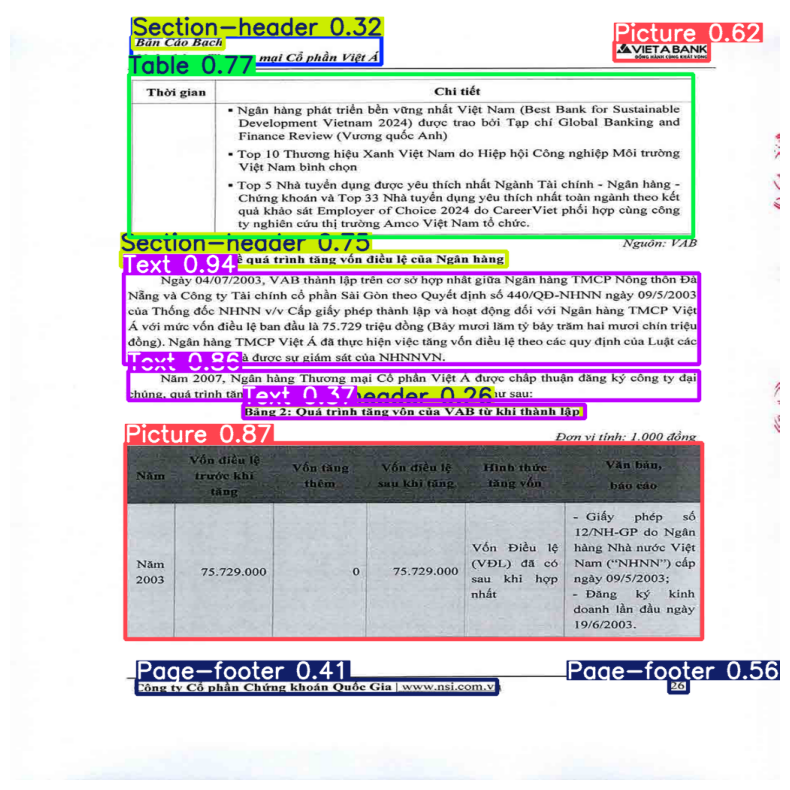

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread("D:\\Document_Layout\\1. VAB - BCB niem yet-028.png", cv2.IMREAD_COLOR)

# OpenCV đọc ảnh theo BGR → cần chuyển sang RGB để hiển thị đúng màu
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Load model
model = YOLO("D:\\Document_Layout\\yolov8n-doclaynet.pt")

# Dự đoán
result = model.predict(img)[0]

# Vẽ bounding box lên ảnh
annotated = result.plot()          # ảnh có box BGR
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)  # chuyển sang RGB

# Hiển thị trong notebook
plt.figure(figsize=(10, 10))
plt.imshow(annotated_rgb)
plt.axis("off")
plt.show()


In [3]:
import os
import cv2
from ultralytics import YOLO

# --- CẤU HÌNH ĐƯỜNG DẪN ---
# Bạn hãy thay đổi đường dẫn input_folder cho đúng với máy của bạn
input_folder = "D:\\Document_Layout\\1. VAB - BCB niem yet"  
output_folder = "D:\\Document_Layout\\Output"
model_path = "D:\\Document_Layout\\yolov8n-doclaynet.pt"

# Tạo folder output nếu chưa tồn tại
os.makedirs(output_folder, exist_ok=True)

# Load model (chỉ load 1 lần bên ngoài vòng lặp)
model = YOLO(model_path)

# Lấy danh sách các file trong folder
image_files = os.listdir(input_folder)

print(f"Bắt đầu xử lý {len(image_files)} file...")

# --- VÒNG LẶP XỬ LÝ ---
for filename in image_files:
    # Kiểm tra xem file có phải là ảnh không (jpg, png, jpeg, bmp...)
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        
        # 1. Tạo đường dẫn đầy đủ
        img_path = os.path.join(input_folder, filename)
        
        # 2. Đọc ảnh
        img = cv2.imread(img_path)
        if img is None:
            print(f"Không đọc được ảnh: {filename}")
            continue

        # 3. Dự đoán (Predict)
        # verbose=False để không in quá nhiều thông tin ra màn hình console
        results = model.predict(img, verbose=False) 
        result = results[0]

        # 4. Vẽ bounding box
        # result.plot() trả về ảnh format BGR (đúng chuẩn OpenCV để lưu)
        annotated_frame = result.plot()

        # 5. Lưu ảnh vào folder output
        save_path = os.path.join(output_folder, filename)
        cv2.imwrite(save_path, annotated_frame)
        
        print(f"Đã xử lý và lưu: {filename}")

print("--- Hoàn tất xử lý toàn bộ ảnh ---")

Bắt đầu xử lý 155 file...
Đã xử lý và lưu: 1. VAB - BCB niem yet-001.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-002.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-003.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-004.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-005.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-006.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-007.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-008.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-009.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-010.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-011.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-012.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-013.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-014.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-015.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-016.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-017.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-018.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-019.png
Đã xử lý và lưu: 1. VAB - BCB niem yet-020.png
Đã xử lý và lưu: 1. VAB - BCB niem